<a href="https://colab.research.google.com/github/heishi1HUMANITY/machine_learning_practice/blob/master/viwe_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/heishi1HUMANITY/machine_learning_practice/master/patient.csv')
diff = []
for i, n in enumerate(data['total_confirmed_cases']):
    if i == 0:
        diff.append(0)
    else:
        pre = i - 1
        diff.append(n - data['total_confirmed_cases'][pre])
data['new_confirmed_cases'] = diff
day = ['Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon']
days = [day[i % 7] for i in range(len(data))]
data['day_of_the_week'] = days

In [0]:
sep_to_day = {
    'Sun': data[data['day_of_the_week'] == 'Sun'],
    'Mon': data[data['day_of_the_week'] == 'Mon'],
    'Tue': data[data['day_of_the_week'] == 'Tue'],
    'Wed': data[data['day_of_the_week'] == 'Wed'],
    'Thu': data[data['day_of_the_week'] == 'Thu'],
    'Fri': data[data['day_of_the_week'] == 'Fri'],
    'Sat': data[data['day_of_the_week'] == 'Sat']
}
mean_of_new_confirmed_cases = {
    'all': data['new_confirmed_cases'].values.mean(),
    'Sun': sep_to_day['Sun']['new_confirmed_cases'].values.mean(),
    'Mon': sep_to_day['Mon']['new_confirmed_cases'].values.mean(),
    'Thu': sep_to_day['Thu']['new_confirmed_cases'].values.mean(),
    'Wed': sep_to_day['Wed']['new_confirmed_cases'].values.mean(),
    'Thu': sep_to_day['Thu']['new_confirmed_cases'].values.mean(),
    'Fri': sep_to_day['Fri']['new_confirmed_cases'].values.mean(),
    'Sat': sep_to_day['Sat']['new_confirmed_cases'].values.mean()
}
std_of_new_confirmed_cases = {
    'all': data['new_confirmed_cases'].values.std(),
    'Mon': sep_to_day['Mon']['new_confirmed_cases'].values.std(),
    'Sun': sep_to_day['Sun']['new_confirmed_cases'].values.std(),
    'Thu': sep_to_day['Thu']['new_confirmed_cases'].values.std(),
    'Wed': sep_to_day['Wed']['new_confirmed_cases'].values.std(),
    'Thu': sep_to_day['Thu']['new_confirmed_cases'].values.std(),
    'Fri': sep_to_day['Fri']['new_confirmed_cases'].values.std(),
    'Sat': sep_to_day['Sat']['new_confirmed_cases'].values.std()
}
min_of_new_confirmed_cases = {
    'all': data['new_confirmed_cases'].values.min(),
    'Mon': sep_to_day['Mon']['new_confirmed_cases'].values.min(),
    'Sun': sep_to_day['Sun']['new_confirmed_cases'].values.min(),
    'Thu': sep_to_day['Thu']['new_confirmed_cases'].values.min(),
    'Wed': sep_to_day['Wed']['new_confirmed_cases'].values.min(),
    'Thu': sep_to_day['Thu']['new_confirmed_cases'].values.min(),
    'Fri': sep_to_day['Fri']['new_confirmed_cases'].values.min(),
    'Sat': sep_to_day['Sat']['new_confirmed_cases'].values.min()
}
max_of_new_confirmed_cases = {
    'all': data['new_confirmed_cases'].values.max(),
    'Mon': sep_to_day['Mon']['new_confirmed_cases'].values.max(),
    'Sun': sep_to_day['Sun']['new_confirmed_cases'].values.max(),
    'Thu': sep_to_day['Thu']['new_confirmed_cases'].values.max(),
    'Wed': sep_to_day['Wed']['new_confirmed_cases'].values.max(),
    'Thu': sep_to_day['Thu']['new_confirmed_cases'].values.max(),
    'Fri': sep_to_day['Fri']['new_confirmed_cases'].values.max(),
    'Sat': sep_to_day['Sat']['new_confirmed_cases'].values.max()
}

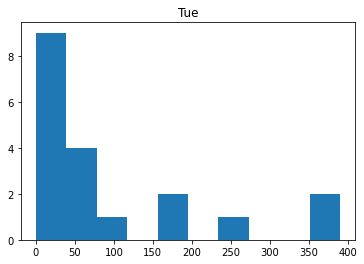

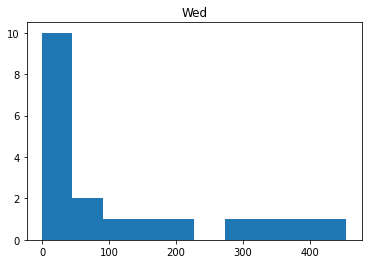

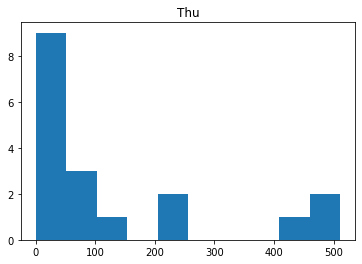

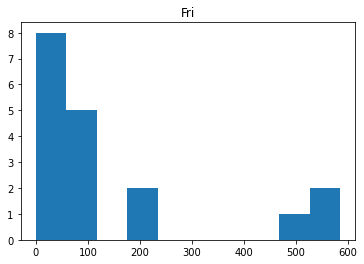

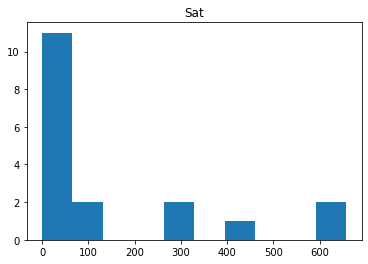

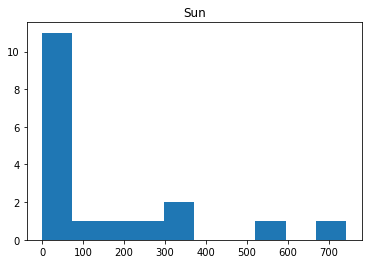

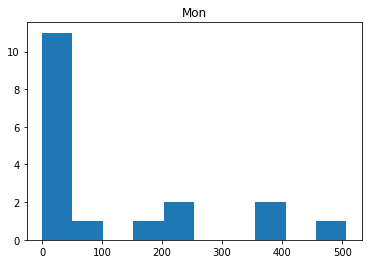

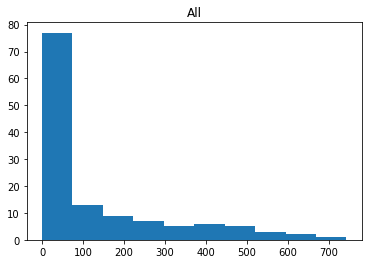

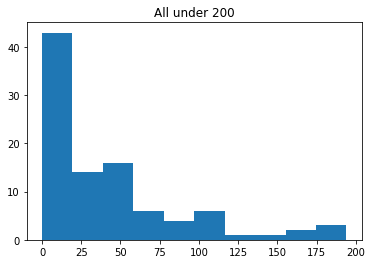

In [4]:
for d in day:
    plt.hist(sep_to_day[d]['new_confirmed_cases'].values)
    plt.title(d)
    plt.show()
plt.hist(data['new_confirmed_cases'].values)
plt.title('All')
plt.show()
plt.hist(data.loc[data['new_confirmed_cases'] < 200, 'new_confirmed_cases'].values)
plt.title('All under 200')
plt.show()

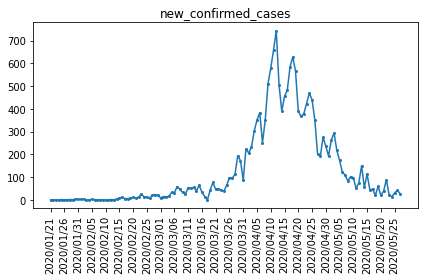

In [5]:
from datetime import datetime as dt
from datetime import timedelta
from google.colab import files

strdt = dt.strptime('2020/01/21', '%Y/%m/%d')
enddt = dt.strptime(data['date'].values[-1], '%Y/%m/%d')
days_num = (enddt - strdt).days + 1

datelist = []
for i in range(days_num):
    datelist.append((strdt + timedelta(days=i)).strftime('%Y/%m/%d'))

plt.plot(range(len(data)), data['new_confirmed_cases'].values, marker='o', markersize=2)
plt.xticks(range(0, len(data), 5), datelist[::5], rotation=90)
plt.title('new_confirmed_cases')
plt.tight_layout()
plt.show()
# # 保存用
# plt.savefig('new_confirmed_cases', figsize=(2000., 1000.), dpi=150)

In [6]:
big = []
for i, d in enumerate(data['new_confirmed_cases']):
    if i != 0:
        if(data['new_confirmed_cases'].values[i - 1] - d > 100):
            big.append(i)
for i in big:
    print(data.loc[i], '\n')
    print('Previous Day\n', data.loc[i - 1], '\n\n')

date                     2020/04/07
total_confirmed_cases          3906
new_confirmed_cases             252
day_of_the_week                 Tue
Name: 77, dtype: object 

Previous Day
 date                     2020/04/06
total_confirmed_cases          3654
new_confirmed_cases             383
day_of_the_week                 Mon
Name: 76, dtype: object 


date                     2020/04/13
total_confirmed_cases          7255
new_confirmed_cases             507
day_of_the_week                 Mon
Name: 83, dtype: object 

Previous Day
 date                     2020/04/12
total_confirmed_cases          6748
new_confirmed_cases             743
day_of_the_week                 Sun
Name: 82, dtype: object 


date                     2020/04/14
total_confirmed_cases          7645
new_confirmed_cases             390
day_of_the_week                 Tue
Name: 84, dtype: object 

Previous Day
 date                     2020/04/13
total_confirmed_cases          7255
new_confirmed_cases             50

In [7]:
data[data['new_confirmed_cases'] <= 20]

,date,total_confirmed_cases,new_confirmed_cases,day_of_the_week
0,2020/01/21,1,0,Tue
1,2020/01/22,1,0,Wed
2,2020/01/23,1,0,Thu
3,2020/01/24,1,0,Fri
4,2020/01/25,3,2,Sat
5,2020/01/26,3,0,Sun
6,2020/01/27,4,1,Mon
7,2020/01/28,6,2,Tue
8,2020/01/29,7,1,Wed
9,2020/01/30,11,4,Thu


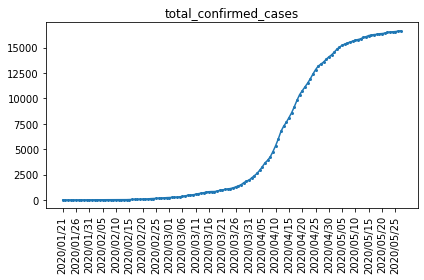

In [8]:
plt.plot(range(len(data)), data['total_confirmed_cases'].values, marker='o', markersize=2)
plt.xticks(range(0, len(data), 5), datelist[::5], rotation=90)
plt.title('total_confirmed_cases')
plt.tight_layout()
plt.show()
# # 保存用
# plt.savefig('total_confirmed_cases', figsize=(2000., 1000.), dpi=150)